## Inicjalizacja środowiska programistycznego

In [ ]:
#Color printing
from termcolor import colored

#General data operations library
import math, string, glob
from datetime import datetime
import numpy as np
import functools

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf
import tensorflow_datasets as tfds
#import tensorflow_text as tf_text

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("drive/MyDrive/modules")

#Private functions
import plotting_function as plf
importlib.reload(plf);

import text_functions as txt_fcn
importlib.reload(txt_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

Istnieje, niekompletny, zbiór standardowych operacji jakie wykonujemy na różnego typu danych zanim zostaną użyte jako wejście do modelu.
API Keras dostarcza gotowych warstw wykonujących wiele z tych [operacji](https://www.tensorflow.org/guide/keras/preprocessing_layers).
W tym notatniku użyjemy kilku z nich dla różnych rodzajów danych: **numerycznych**, **tekstowych**, **obrazów**.

## Dane numeryczne

### Normalizacja

Standardowa operacja, jaką wykonujemy na danych numerycznych przez podaniem ich na wejście modelu to normalizacja.
Normalizacja powoduje że rząd wielkości wag jest podobny dla wszystkich cech, a same wagi nei są zbyt duże.

```Python

normalization = tf.keras.layers.Normalization(mean, variance) # Normalizacja danych do średniej mean i wariancji wariance
                                                               # domyślnie mean=0, variance=1
                                                               # normalizacja przebiega dla każdej cechy oddzielnie
                                                               # wymaga ustalenia współczynników normalizacji przez metodę adapt(x)
normalization.adapt(x)                                                             
```


**Proszę:**

* wygenerować zbiór `(n,3)` liczb pochodzących z rozkładu płaskiego w zakresach `[[-5,5],[-4,2],[2,2]]`
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w zbiorze
* znormalizować dane do zakresu `[0,1]` dla każdej cechy oddzielnie
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w znormalizowanym zbiorze
* sprawdzić czy normalizacja zadziałała zgodnie z oczekiwaniem

In [ ]:
n = 10000

x = tf.random.uniform([n, 3])
scales = np.array([[-5, 5], [-4, 2], [-2, 2]])
ranges = scales[:, 1] - scales[:, 0]
x = x*ranges + scales[:, 0]

print(tf.math.reduce_min(x, axis = 0).numpy())
print(tf.math.reduce_max(x, axis = 0).numpy())
print(tf.math.reduce_mean(x, axis = 0).numpy())
print(tf.math.reduce_std(x, axis = 0).numpy())

normalization = tf.keras.layers.Normalization()
normalization.adapt(x)
x = normalization(x)

print(tf.math.reduce_min(x, axis = 0).numpy())
print(tf.math.reduce_max(x, axis = 0).numpy())
print(tf.math.reduce_mean(x, axis = 0).numpy())
print(tf.math.reduce_std(x, axis = 0).numpy())

pass

[-4.9991503 -3.9979823 -1.9987388]
[4.996563  1.9997978 1.9995346]
[-0.01547572 -1.0028058   0.0316603 ]
[2.8718703 1.7334986 1.150689 ]
[-1.7353425 -1.7278221 -1.764507 ]
[1.7452191 1.7321066 1.7101703]
[ 7.6293949e-09 -4.2343139e-08  1.0681152e-08]
[1.0000008  1.0000002  0.99999976]



### Dyskretyzacja

Czasami użyteczny jest podział danych numerycznych na kategorie - **dyskretyzacja**.
W sytuacji, gdy nie potrzebujemy dużej rozdzielczości wartości zmiennoprzecinkowe możemy podzielić
np. na `małe`, `średnie` i `duże`.
Redukcja rozdzielczości z poziomu zmiennoprzecinkowego do listy kategorii może też ułatwić trening.

```Python

discretization = tf.keras.layers.Discretization(num_bins, bin_boundaries, output_mode)
                 # Zamiana zmiennej ciągłej na dyskretną w postaci:
                 # output_mode = int - numer przedziału (wartość domyślna)
                 #               one_hot - wektor typu kodowania gorącojedynkowego
                 # num_bins - liczba przedziałów (wymaga zawołania metody adapt(x))
                 # bin_boundaries - zakresy przedziałów
```

**Proszę:**

* zdyskretyzować dane z poprzedniej komórki do 10 przedziałów
* narysować histogram numerów przedziałów dla **wszystkich** cech

(array([4701., 3193., 3610., 2700., 3340., 3045., 2911., 2429., 2287.,
        1784.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

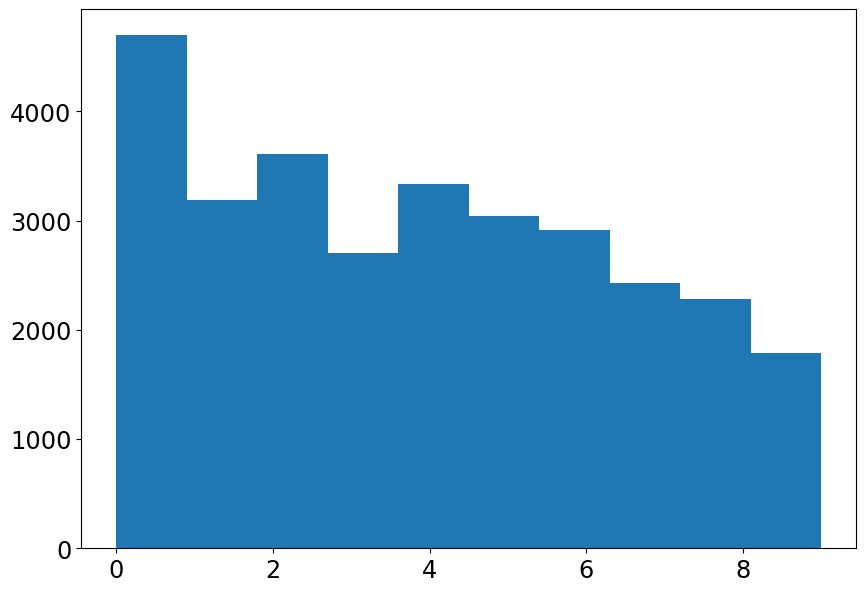

In [ ]:
discretization = tf.keras.layers.Discretization(num_bins = 10)
discretization.adapt(x)
y = discretization(x)

plt.subplot(1, 1, 1)
plt.hist(tf.reshape(shape = (-1,), tensor = y))
#Either use flatten()

## Obrazy

**Proszę:**

* korzystając z biblioteki `tensorflow_datasets` załadować zbiór `imagenette/160px`
* narysować kilka przykładowych rysunków

In [ ]:
ds, ds_info = tfds.load('imagenette/160px', split = 'train', with_info = True)
tfds.benchmark(ds.batch(1))

pass

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12894 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/160px/1.0.0.incomplete609OQ0/imagenette-train.tfrecord*...:   0…

Generating validation examples...:   0%|          | 0/500 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/160px/1.0.0.incomplete609OQ0/imagenette-validation.tfrecord*...…

Dataset imagenette downloaded and prepared to /root/tensorflow_datasets/imagenette/160px/1.0.0. Subsequent calls will reuse this data.

************ Summary ************



  0%|          | 0/12894 [00:00<?, ?it/s]

Examples/sec (First included) 1048.15 ex/sec (total: 12895 ex, 12.30 sec)
Examples/sec (First only) 8.67 ex/sec (total: 1 ex, 0.12 sec)
Examples/sec (First excluded) 1057.98 ex/sec (total: 12894 ex, 12.19 sec)


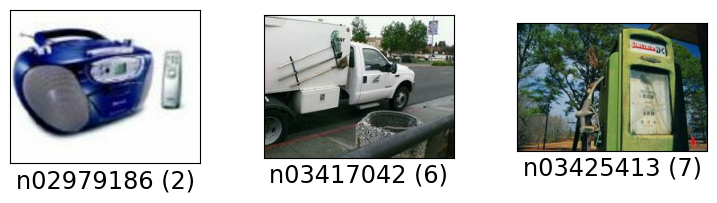

In [ ]:
fig = tfds.show_examples(ds, ds_info, rows = 1, cols = 3)


### Skalowanie

Zmiana rozdzielczości - skalowanie obrazu. Skalowanie wymaga podania algorytmu interpolacji, pozwalającego
na obliczenie wartości pikseli w nowym obrazie.

```Python
tf.keras.layers.Resizing(
    height, width,                # szerokość i wysokość nowego obrazu
    interpolation='bilinear',     # algorytm interpolacji
    crop_to_aspect_ratio=False,   # przycinanie obrazu w celu uzyskania
                                  # tego samego stosunku szerokość/długość
                                  # jak w obrazie oryginalnym
)
```


## Przycinane

z całego obrazu jest wycinany fragment, `ramka`:


```Python
tf.keras.layers.CenterCrop(
    height, width              # szerokość i wysokość prostokąta wycinającego
                               # fragment w środku obrazu
)
```

Przycinanie w losowym miejscu może być użyte do wzbogacania próbki, poprzez generację
losowych fragmentów obrazu - ang. `augmenting`. Warstwy wykonujące losowe operacje na obrazach
są domyślnie aktywne tylko w czasie treningu.

```Python
tf.keras.layers.RandomCrop(
    height, width, seed=None,  # szerokość i wysokość prostokąta wycinającego
                               # fragment w losowym miejscu
                               #
)
```



### Obrót

```Python
tf.keras.layers.RandomRotation(
    factor,                         # zakres obrotu w jednostkach 2pi: (min, max)
    fill_mode='reflect',            # algorytm wypełnienia przestrzeni powstałej po obrocie obrazu
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,                 # wartość piksela użytego do wypełniania przestrzeni powstałej po przesunięciu obrazu,
                                    # jeśli jako `fill_mode=constant`
)
```




### Translacja

```Python
tf.keras.layers.RandomTranslation(
    height_factor,                  # względny współczynnik przesunięcia w pionie: (min, max)
    width_factor,                   # względny współczynnik przesunięcia w poziomie: (min, max)
    fill_mode='reflect',            # algorytm wypełnienia przestrzeni powstałej po przesunięciu obrazu
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,                 # wartość piksela użytego do wypełniania przestrzeni powstałej po przesunięciu obrazu,
                                    # jeśli jako `fill_mode=constant`
)
```


**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:
* skalowaniu obszaru do rozdzielczości `(160,160)`
* wypisać na ekran rozdzielczość pierwszego przykładu

**Wskazówki:**
* należy użyć metody `tf.data.Dataset.map()` z odpowiednią funkcją mapowania opartą o odpowiednią warstwę
* uwaga na typ danych w tensorze zawierającym przetworzone obrazy

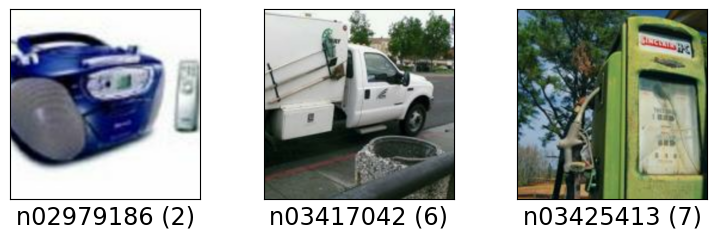

In [ ]:
resize_layer = tf.keras.layers.Resizing(320, 320, crop_to_aspect_ratio=True, dtype = tf.uint8)

# Function to resize images
def resize_image(example):
    image = example['image']
    label = example['label']
    image = resize_layer(image)
    return {'image': image, 'label': label}

# Apply the resizing function to the dataset
resized_ds = ds.map(resize_image)

# Visualize the resized images
fig = tfds.show_examples(resized_ds, ds_info, rows=1, cols=3)
pass

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:
* przycinaniu do obszaru centralnego o rozmiarze `(64,64)`

**Wskazówki:**
* należy użyć metody `tf.data.Dataset.map()` z odpowiednią funkcją mapowania opartą o `tf.keras.layers.CenterCrop`
* uwaga na typ danych w tensorze zawierającym przetworzone obrazy

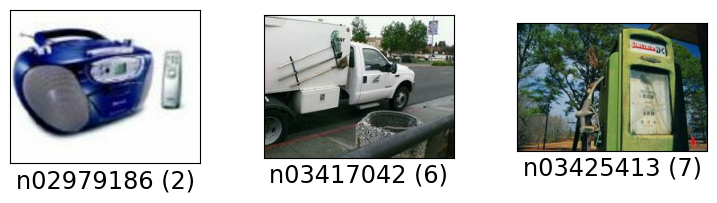

In [ ]:
layer = tf.keras.layers.CenterCrop(64, 64, dtype = tf.uint8)
ds.randomCrop = ds.map(lambda x: {'image': layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds, ds_info, rows = 1, cols = 3)

pass

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:

* losowemu przycinaniu do obszaru o rozmiarze `(64,64)`

**Wskazówki:**
* użycie warstwy w definicji funkcji lambda spowoduje błędy. Proszę spróbować zinterpretować komunikat o błędzie i odpowiednio skorygować kod.


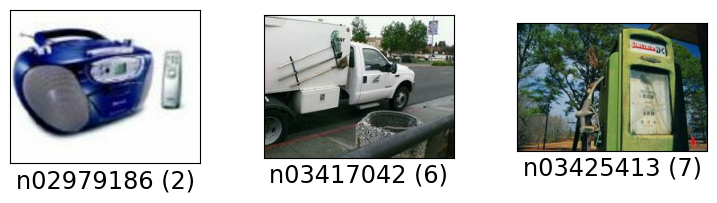

In [ ]:
layer = tf.keras.layers.RandomCrop(64, 64, dtype = tf.uint8)
ds.randomCrop = ds.map(lambda x: {'image': layer(x['image']), 'label': x['label']})
fig = tfds.show_examples(ds, ds_info, rows = 1, cols = 3)

pass

**Proszę:**

Narysować losowe obrazy ze zbioru `imagenette/160px` poddane:

* losowemu obrotowi w zakresie $\pm \pi/4$
* puste miejsca po obrocie proszę wypełnić kolorem czarnym

**Wskazówki:**
* użycie warstwy w definicji funkcji lambda spowoduje błędy. Proszę spróbować zinterpretować komunikat o błędzie i odpowiednio skorygować kod.


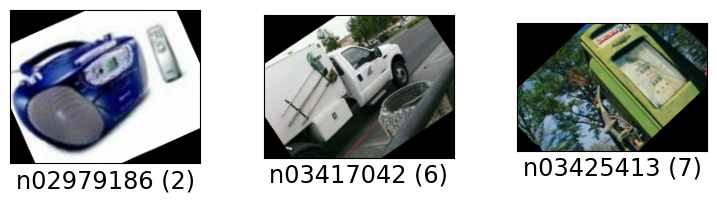

In [ ]:
rotation_layer = tf.keras.layers.RandomRotation(factor=(0, 1/8), fill_mode='constant', fill_value=0.0, dtype = tf.uint8)

# Function to apply random rotation to images
def rotate_image(example):
    image = example['image']
    label = example['label']
    image = rotation_layer(image)
    return {'image': image, 'label': label}

# Apply the random rotation function to the dataset
rotated_ds = ds.map(rotate_image)

# Visualize the rotated images
fig = tfds.show_examples(rotated_ds, ds_info, rows=1, cols=3)

pass

## Dane tekstowe

Zamiana tekstu na postać cyfrową może być wykonana na wiele sposobów. Dwa najbardziej popularne to:
* **wektoryzacja (ang. text vectorization)** - każdemu znacznikowi (ang. `token`) jest przypisana liczba całkowita, indeks w słowniku.
                 Odwzrorowanie   ${\mathrm tekst}  \leftrightarrow {\mathrm indeks}$ jest ustalane na podstawie zawartości zbioru danych.

* **zanurzanie (ang. embedding)** - każdemu znacznikowi jest przypisany n-wymiarowy wektor liczb zmiennoprzecinkowych.
    Odwzrorowanie   ${\mathrm tekst}  \leftrightarrow {\mathrm indeks}$ jest znajdowanie w czasie treningu modelu.

### Wektoryzacja

```Python
tf.keras.layers.TextVectorization(
    max_tokens=None,                           # maksymalna liczba znaczników w słowniku
    standardize='lower_and_strip_punctuation', # algorytm standaryzacji tekstu
    split='whitespace',                        # algorytm podziału na słowa
    ngrams=None,                               # algorytm podziału słów na n-literowe fragmenty
    output_mode='int',                         # typ wyjścia   
    output_sequence_length=None,               # maksymalna długość zakodowanej sekwencji "zdania"
    pad_to_max_tokens=False,                   # czy dopełniać sekwencję zerami do maksymalnej długości
    vocabulary=None                            # słownik. Jeśli nie jest podany generacja słownika wymaga zawołania
                                               # metody adapt()
)
 ```

 Znaczniki nie występujące w słowniku otrzymają ten sam indeks oznaczający znacznik OOV (`ang. out of vocabulary`)

**Proszę:**

* zbudować słownik na tekście `wksf/Korpus_surowy` wczytywanym w ramach zadania domowego z poprzedniego notatnika
* zwektoryzować teskt `Król zasiada na tronie.`
* wypisać na ekran zwektoryzowaną postać
* przeprowadzić operację odwrotną - z postaci zwektoryzowanej odtworzyć tekst
* powtórzyć procedurę dla tekstu `Ania ma małego kotka.`

**Wskazówki**:
* słownik utworzony przez warstwę `tf.keras.layers.TextVectorization` uzyskujemy przez metodę `get_vocabulary()`
* z elementów sekwencji `words` można utworzyć napis w następujący sposób:
```Python
sentence = " ".join(words)
```


In [ ]:
import text_functions as txt_fcn
importlib.reload(txt_fcn)

filePath = "drive/MyDrive/Files/Korpus/Korpus Surowy 2/"
dataset = txt_fcn.load_wksf_dataset(filePath)

for item in dataset.skip(0).take(5):
    print(item.numpy().decode("utf8"))

pass

Co myślał ten artysta? .. No, ewentualnie, prawdopodobnie .. a widzi pan kolega! No właśnie! Od razu mówiłem, że coś w tym jest .. wyobraźnia, drogi panie kolego. Wyobraźnia .. ha, co robić. Pan kolega się myje? Proszę bardzo. Pan inżynier będzie łaskaw pierwszy. Ja zaczekam .. uwinę się raz dwa. Ciekaw jestem, kto zostawił to mydło?
Za komodą ... Widocznie tu był apartament. Zamknięte ... No to w porządku .. Nic nie widać. Zatkane papierem ... Jasne. Zawsze zatykają ... Co pan kolega zamierza? ... Zobaczę, co się da zrobić .. Ależ niech pan da spokój, to nie wypada. Niech pan zgasi to światło i kładzie się spać. Jest pan przecież poważnym człowiekiem. Drogi panie kolego, rozumiem, że w czasach szkolnych. Ale teraz? Jest pan przecież głową rodziny. Co jest?
Trochę tu u nas nieporządek. Kawalerskie gospodarstwo, he, he! .. Jak to dobrze, że jednak ciebie znalazłam .. Mnie? .. Szukałam cię wszędzie. Czy dobrze trafiłam? .. Byłem w rozjazdach, bardzo żałuję. Stałe podróże, wyjazdy. Służbo

In [ ]:
text = 'Król zasiada na tronie'

vectorize_layer = tf.keras.layers.TextVectorization()
vectorize_layer.adapt(dataset)
print(vectorize_layer(x))

tf.Tensor([ 1378 49982    41 30938], shape=(4,), dtype=int64)


In [ ]:
encoded = vectorize_layer(tf.constant(x))
print(encoded.numpy())

[ 1378 49982    41 30938]


In [ ]:
vocabulary = vectorize_layer.get_vocabulary()
vocab_arr = np.array(vocabulary)
decoded = ' '.join(vocab_arr[encoded.numpy()])
print(decoded)

pass

król zasiada na tronie


### Zanurzanie


```Python
tf.keras.layers.Embedding(
    input_dim,                          # rozmiar słownika - liczba znaczników ("tokenów")
    output_dim,                         # wymiar reprezentacji  
)
```

Warstwa zanurzająca przypisuje wartość zmiennoprzecinkową każdemu znacznikowi.
Taką operację można reprezentować przez macierz `(output_dim, input_dim)` która działa na wektor gorącojedynkowy o długości `(input_dim)`.
Tutaj `output_dim=3`:

$$
\huge{
\begin{bmatrix}
a_{0} & b_{0} & c_{0} & \dots \\
a_{1} & b_{1} & c_{1} & \dots \\
a_{2} & b_{2} & c_{2} & \dots \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
0 \\
0 \\
\dots \\
0
\end{bmatrix}
=
\begin{bmatrix}
a_{0} \\
a_{1} \\
a_{2}
\end{bmatrix}
}
$$
Warstwa `tf.keras.layers.Enbedding()` realizuje tę operację w sposób zoptymalizowany.
Macierz zanurzania jest zwykle zmieniana w trakcie treningu modelu który ją zawiera, więc nie jest to standardowa warstwa wstępnego przetwarzania.


**Proszę:**

* zwektoryzować teskt `Król zasiada na tronie.`
* zwektoryzowaną postać podać na wejście warstwy zanurzającej z `nDims = 4`
* wypisać na ekran obie postacie tekstu

In [ ]:
embedding_layer = tf.keras.layers.Embedding(len(vocabulary), 4)

print(encoded)
print(embedding_layer(encoded))


pass

tf.Tensor([ 1378 49982    41 30938], shape=(4,), dtype=int64)
tf.Tensor(
[[-0.0193123  -0.01313474 -0.01355877  0.01149946]
 [-0.00174446 -0.01925056 -0.00655242 -0.00923651]
 [ 0.00112965 -0.02253668  0.00524933  0.04444697]
 [ 0.03397689 -0.03483474  0.00862461  0.02391319]], shape=(4, 4), dtype=float32)


### Podział na n-gramy

W czasie analizy tekst zwykle dzieli się na fragmenty zawierające `n` znaczników (ang. `tokens`) - n-gramy.
Podzielimy zdania wczytane z korpusu języka polskiego na odcinki o długości `n` wyrazów. Skorzystamy z gotowych funkcji służących do operowania na napisach dostępnych
w dedykowanej bibliotece `tensorflow_text`

* podział tekstu na fragmenty (tutaj wyrazy oddzielone spacją):
```Python
tensorflow_text.WhitespaceTokenizer().tokenize(text)
```

* tworzenie grup o wybranej długości z użyciem biegnącego okna - grupy się przekrywają za wyjątkiem ostatniego wyrazu
```Python
tensorflow_text.tf_text.sliding_window(data,        # lista znaczników        
                                        width,      # szerokość okna przebiegającego listę
                                        axis=-1,    # wymiar wzdłuż którego biegnie okno
                                        name=None   # nazwa funkcji
```

In [ ]:
import text_functions as txt_fcn
importlib.reload(txt_fcn)

filePath = "drive/MyDrive/Files/Korpus/Korpus Surowy 2/"
dataset = txt_fcn.load_wksf_dataset(filePath)

import tensorflow_text as tf_text
import functools

# split lines into words
dataset = dataset.map(tf_text.WhitespaceTokenizer().tokenize)

# remove empty lines
dataset = dataset.filter(lambda x: tf.size(x) > 0)

# fix all function arguments except for the input data
window_size = 5
slidingWindowWithWidth = functools.partial(tf_text.sliding_window, width=window_size)

# apply the sliding window to each line.
# this will priduce a tensor of shape (n, width) for each line,
# where n in the number of groups of words of words of width length
dataset = dataset.map(slidingWindowWithWidth)

print(colored("First example:", "blue"))
for item in dataset.skip(1).take(1):
    print(colored("Text: ", "blue"), item.numpy())

First example:
Text:  [[b'Za' b'komod\xc4\x85' b'...' b'Widocznie' b'tu']
 [b'komod\xc4\x85' b'...' b'Widocznie' b'tu' b'by\xc5\x82']
 [b'...' b'Widocznie' b'tu' b'by\xc5\x82' b'apartament.']
 [b'Widocznie' b'tu' b'by\xc5\x82' b'apartament.' b'Zamkni\xc4\x99te']
 [b'tu' b'by\xc5\x82' b'apartament.' b'Zamkni\xc4\x99te' b'...']
 [b'by\xc5\x82' b'apartament.' b'Zamkni\xc4\x99te' b'...' b'No']
 [b'apartament.' b'Zamkni\xc4\x99te' b'...' b'No' b'to']
 [b'Zamkni\xc4\x99te' b'...' b'No' b'to' b'w']
 [b'...' b'No' b'to' b'w' b'porz\xc4\x85dku']
 [b'No' b'to' b'w' b'porz\xc4\x85dku' b'..']
 [b'to' b'w' b'porz\xc4\x85dku' b'..' b'Nic']
 [b'w' b'porz\xc4\x85dku' b'..' b'Nic' b'nie']
 [b'porz\xc4\x85dku' b'..' b'Nic' b'nie' b'wida\xc4\x87.']
 [b'..' b'Nic' b'nie' b'wida\xc4\x87.' b'Zatkane']
 [b'Nic' b'nie' b'wida\xc4\x87.' b'Zatkane' b'papierem']
 [b'nie' b'wida\xc4\x87.' b'Zatkane' b'papierem' b'...']
 [b'wida\xc4\x87.' b'Zatkane' b'papierem' b'...' b'Jasne.']
 [b'Zatkane' b'papierem' b'...' b'J

**Proszę:**

* stworzyć słownik do wektoryzacji tekstu używając warstwy `tf.keras.layers.TextVectorization.adapt(...)`
* stworzyć zwektoryzowany zbiór danych: `dataset_vectorized` używając warstwy `tf.keras.layers.TextVectorization` i operacji `dataset.map()`
* zachować słownik w zmiennej `vocabulary` w postaci macierzy numpy
* wypisać na ekran liczbę znaczników w słowniku
* wypisać na ekran pięć pierwszych przykładów w zwektoryzowanej postaci

**Wskazówka:**
* operacje na zbiorach danych można przyspieszyć wykonując je na paczkach:
```Python
dataset.batch(n).map(...).unbatch()
```

In [ ]:
dataset = dataset.unbatch()

dataset = dataset.map(lambda x: tf.strings.reduce_join(x, separator = ' '))

print(colored("First five five-word blocks in the vectorized form:", "blue"))
for item in dataset.take(5):
    print(colored("Text: ", "blue"), item)

First five five-word blocks in the vectorized form:
Text:  tf.Tensor(b'Co my\xc5\x9bla\xc5\x82 ten artysta? ..', shape=(), dtype=string)
Text:  tf.Tensor(b'my\xc5\x9bla\xc5\x82 ten artysta? .. No,', shape=(), dtype=string)
Text:  tf.Tensor(b'ten artysta? .. No, ewentualnie,', shape=(), dtype=string)
Text:  tf.Tensor(b'artysta? .. No, ewentualnie, prawdopodobnie', shape=(), dtype=string)
Text:  tf.Tensor(b'.. No, ewentualnie, prawdopodobnie ..', shape=(), dtype=string)


In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization()
vectorize_layer.adapt(dataset.batch(1024))
dataset_vectorized = dataset.batch(1024).map(vectorize_layer).unbatch()

vocabulary = vectorize_layer.get_vocabulary()
vocab_arr = np.array(vocabulary)

#dataset_vectorized = dataset_vectorized(lambda x: tf.math.count_nonzero(x==1, axis = 0) < 2)



pass


TypeError: '_UnbatchDataset' object is not callable

In [ ]:
print(vocab_arr.shape[0])
for item in dataset_vectorized.take(5):
  print(item)

86504
tf.Tensor([  15 1843   39 6719    0], shape=(5,), dtype=int64)
tf.Tensor([1843   39 6719   63    0], shape=(5,), dtype=int64)
tf.Tensor([  39 6719   63 5179    0], shape=(5,), dtype=int64)
tf.Tensor([6719   63 5179 1137    0], shape=(5,), dtype=int64)
tf.Tensor([  63 5179 1137    0    0], shape=(5,), dtype=int64)


**Proszę:**

* przekształcić zwektoryzowany zbiór zawierający n-gramy do postaci `(cechy, etykieta)` gdzie:
    * **etykieta** - środkowy wyraz
    * **cechy** - wyrazy poza wyrazem środkowym

* przekształcenie powinno korzystać z metody `Dataset.map(...)` z użyciem własnej funkcji mapującej `map_fn(...)`
* założyć, że zbiór został podzielony na paczki, więc pojedynczy element ma kształt `(None,width)`
* wypisać na ekran cechy i etykiety dla pięciu przykładów

**Wskazówki**:
* można założyć że `n=5`
* można założyć, że środkowy wyraz ma indeks `2`


In [ ]:
###################################################
def map_fn(x, middle = 2):
    features = tf.concat((x[:, :middle], x[:, middle+1:]), axis=1)
    label = x[:, middle]
    return features, label

###################################################
def print_item(batch, vocabulary, width=2):
    batch_index = 0
    item = (batch[0][batch_index], batch[1][batch_index])
    features = " ".join(vocab_arr[item[0].numpy()[0:width]])
    label = vocabulary[item[1].numpy()]
    print(colored("Features", "blue"), end=" ")
    print(colored("(Label):", "red"), end=" ")

    print(features, end=" ")
    print(colored(label,"red"), end=" ")
    features = " ".join(vocab_arr[item[0].numpy()[width:]])
    print(features)
###################################################

dataset_final = dataset_vectorized.batch(32).map(map_fn)

for item in dataset_final.take(5):
    print_item(item, vocabulary)
    print(colored("Vectorized form:", "blue"), )
    print(colored("Features: ", "blue"), item[0][0].numpy(), end=" ")
    print(colored("Label: ", "blue"), item[1][0].numpy())

Features (Label): co myślał ten artysta 
Vectorized form:
Features:  [  15 1843 6719    0] Label:  39
Features (Label): robić pan kolega się myje
Vectorized form:
Features:  [  519    29     4 64390] Label:  2327
Features (Label): w porządku nic nie 
Vectorized form:
Features:  [  2 648   6   0] Label:  75
Features (Label): niech pan zgasi to światło
Vectorized form:
Features:  [124  29   9 917] Label:  38561
Features (Label): kawalerskie gospodarstwo he he 
Vectorized form:
Features:  [68854  3630  4130     0] Label:  4130


In [ ]:
def map_fn(x):
    features = np.delete(x, 2)
    label = x[2]
    return features, label

print(map_fn(np.array([1, 2, 3, 4, 5])))

(array([1, 2, 4, 5]), 3)


**Proszę:**

* sprawdzić prędkość czytania finalnego zbioru danych korzystając z funkcji `benchmark`


In [ ]:
tfds.benchmark(dataset_final)
pass


************ Summary ************



0it [00:00, ?it/s]

Examples/sec (First included) 523.14 ex/sec (total: 16214 ex, 30.99 sec)
Examples/sec (First only) 1.66 ex/sec (total: 1 ex, 0.60 sec)
Examples/sec (First excluded) 533.50 ex/sec (total: 16213 ex, 30.39 sec)


# Zadanie domowe

**Proszę:**

* załadować tekst z pliku filePath = `shakespeare.txt'`

```Python

filePath = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
```

* wykonać `preprocessing` tekstu:
    * podział tekstu na fragmenty o długości pięciu wyrazów. Jeden przykład w nowym zbiorze powinien składać się jednego 5-wyrazowych przykładu, a nie grupy
      powstałej z podziału zdania na kawałki o długości pięciu wyrazów:
      ```
      
      Features (Label): before we proceed any further
      Features:  [128  33 123 639] Label:  1267
      ```
    * tokenizacja ze słownikiem ograniczonym do **1000** znaczników
    * podział fragmentów na etykietę (wyraz środkowy) i cechy (pozostałe wyrazy)
* wypisać na ekran pięć przykładów z zaznaczeniem cech i etykiety
* stworzyć warstwę zanurzającą ze `128` wymiarami
* wypisać na ekran pięć wyrazów najbliższych wyrazowi `man` w przestrzeni zanurzającej z odległością kosinusową:
```Python
cosine_similarity = tf.keras.losses.cosine_similarity(...)
```
* wypisać na ekran pięć słów najbliższych do sumy słów `mother` i `father` wykonanej w przestrzeni zanurzenia

**Wskazówki:**
* największe `n` wartości z listy można uzyskać funkcją `tf.math.top_k(...)`


<hr>

**Opcjonalnie:**

* przeprowadzić trening warstwy zanurzającej ze `128` wymiarami z użyciem algorytmu ciągłego worka słów - [`Continous Bag of Words (CBOW)`](https://d2l.ai/chapter_natural-language-processing-pretraining/word2vec.html#the-continuous-bag-of-words-cbow-model) (wersja naiwna).

**Wskazówki:**

* obliczenie iloczynu skalarnego reprezentacji cech i wszystkich słów słownika wymaga zdefiniowania warstwy liczącej iloczyn skalarny:
```Python
class Dot(tf.keras.Layer):
    def call(self, x):
        dot_product = ...
        return dot_product

```
i użycia jej w definicji modelu.


In [ ]:

# load text
import tensorflow_text as tf_text
import functools

import text_functions as txt_fcn
importlib.reload(txt_fcn)

filePath = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
dataset = txt_fcn.load_wksf_dataset2(filePath)

# adapt vextorization layer
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens = 1000)
vectorize_layer.adapt(dataset.batch(1024))

# split lines into words
dataset = dataset.map(tf_text.WhitespaceTokenizer().tokenize)

# fix all tf_text.sliding_window function arguments except for the input data
window_size = 5
slidingWindowWithWidth = functools.partial(tf_text.sliding_window, width=window_size)

# apply the sliding window to each line.
# this will produce a tensor of shape (n, width) for each line,
# where n in the number of groups of words with length width

dataset = dataset.map(slidingWindowWithWidth)

# remove empty lines

def is_not_empty(tensor):
    return tf.not_equal(tf.shape(tensor)[0], 0)

dataset = dataset.filter(is_not_empty)

# split the (n, width) tensor into (n) tensors of shape (width)
def split_rows(tensor):
    return tf.data.Dataset.from_tensor_slices(tensor)

# Apply the flat_map function to split each tensor into its rows
dataset = dataset.flat_map(split_rows)


#Vectorize
dataset_vectorized = dataset.map(vectorize_layer)

vocabulary = np.array(vectorize_layer.get_vocabulary())

###################################################
def map_fn(x, middle = 2):
    features = tf.concat((x[:, :middle], x[:, middle+1:]), axis=1)
    label = x[:, middle]
    return features, label

def print_item(batch, vocabulary, width=2):
    batch_index = 0
    item = (batch[0][batch_index], batch[1][batch_index])
    features = " ".join(vocabulary[item[0].numpy()[0:width]])
    label = vocabulary[item[1].numpy()]
    print(colored("Features", "blue"), end=" ")
    print(colored("(Label):", "red"), end=" ")

    print(features, end=" ")
    print(colored(label,"red"), end=" ")
    features = " ".join(vocabulary[item[0].numpy()[width:]])
    print(features)
###################################################

dataset_final = dataset_vectorized.batch(32).map(map_fn).unbatch()

for item in dataset_final.take(5):
    print_item(item, vocabulary, width=2)
    print(colored("Features: ", "blue"), item[0][0].numpy(), end=" ")
    print(colored("Label: ", "blue"), item[1][0].numpy())

Reading text from files: ['/root/.keras/datasets/shakespeare.txt']
Features (Label): before proceed 
Features:  [138] Label:  982
Features (Label): we any 
Features:  [36] Label:  144
Features (Label): proceed further 
Features:  [982] Label:  673
Features (Label): any hear 
Features:  [144] Label:  125
Features (Label): you all 
Features:  [7] Label:  34


In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 42.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
     

In [ ]:
for item in dataset.take(10):
  print(item)
for item in dataset_vectorized.take(10):
  print(item)

tf.Tensor([b'Before' b'we' b'proceed' b'any' b'further,'], shape=(5,), dtype=string)
tf.Tensor([b'we' b'proceed' b'any' b'further,' b'hear'], shape=(5,), dtype=string)
tf.Tensor([b'proceed' b'any' b'further,' b'hear' b'me'], shape=(5,), dtype=string)
tf.Tensor([b'any' b'further,' b'hear' b'me' b'speak.'], shape=(5,), dtype=string)
tf.Tensor([b'You' b'are' b'all' b'resolved' b'rather'], shape=(5,), dtype=string)
tf.Tensor([b'are' b'all' b'resolved' b'rather' b'to'], shape=(5,), dtype=string)
tf.Tensor([b'all' b'resolved' b'rather' b'to' b'die'], shape=(5,), dtype=string)
tf.Tensor([b'resolved' b'rather' b'to' b'die' b'than'], shape=(5,), dtype=string)
tf.Tensor([b'rather' b'to' b'die' b'than' b'to'], shape=(5,), dtype=string)
tf.Tensor([b'to' b'die' b'than' b'to' b'famish?'], shape=(5,), dtype=string)
tf.Tensor(
[[138]
 [ 36]
 [982]
 [144]
 [673]], shape=(5, 1), dtype=int64)
tf.Tensor(
[[ 36]
 [982]
 [144]
 [673]
 [125]], shape=(5, 1), dtype=int64)
tf.Tensor(
[[982]
 [144]
 [673]
 [125]

In [ ]:





for item in dataset.skip(1).take(10):
    print(colored("Text: ", "blue"), item.numpy())



dataset_vectorized = dataset.batch(1024).map(vectorize_layer).unbatch()

vocabulary = vectorize_layer.get_vocabulary()
vocab_arr = np.array(vocabulary)

NameError: name 'int32' is not defined

In [ ]:
# CBOW model training (optional)
...rozwiązanie...

#Evaluate non trained model
model.evaluate(dataset_final.take(16))

#Training
...rozwiązanie...
pass

In [ ]:
#Embedding space
embedding_layer = tf.keras.layers.Embedding(1000, 128)

print(vocabulary[vectorize_layer('My mother told me Someday I will buy Galleys with good oars Sail to distant shores')])
print(embedding_layer(vectorize_layer('My mother told me Someday I will buy Galleys with good oars Sail to distant shores')))

#cosine_similarity = tf.keras.losses.cosine_similarity(...)

#największe n wartości z listy można uzyskać funkcją tf.math.top_k(...)


['my' 'mother' 'told' 'me' '[UNK]' 'i' 'will' 'buy' '[UNK]' 'with' 'good'
 '[UNK]' '[UNK]' 'to' '[UNK]' '[UNK]']
tf.Tensor(
[[-0.02133158  0.01481615 -0.00989989 ... -0.01013807  0.02214501
  -0.00892843]
 [ 0.04570488 -0.04004189  0.02982399 ... -0.0466702  -0.04863335
  -0.02801443]
 [ 0.01162932 -0.00447579 -0.04644444 ... -0.03961456 -0.04480276
  -0.01616664]
 ...
 [ 0.00412916 -0.02918868 -0.02759137 ... -0.01051234  0.0311335
  -0.00184377]
 [ 0.02583968  0.01459343 -0.00698983 ... -0.00406218 -0.0456641
   0.01296962]
 [ 0.02583968  0.01459343 -0.00698983 ... -0.00406218 -0.0456641
   0.01296962]], shape=(16, 128), dtype=float32)


In [ ]:
# Embeding space exploration - words similar to "man"
word = 'man'

dictionary = {}
distance_list = []

for i in range(0, 1000):
  distance = tf.keras.losses.cosine_similarity(embedding_layer(vectorize_layer(word)), embedding_layer(tf.constant(i)))
  translation = vocabulary[i]
  distance_list.append(distance)
  dictionary[distance.ref()] = translation

for item in tf.math.top_k(distance_list, k=3):
  print(dictionary[item.ref()])


pass

InvalidArgumentError: {{function_node __wrapped__TopKV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} input must have at least k columns. Had 1, needed 3 [Op:TopKV2]

In [ ]:
numbers = tf.range(0, 1000)
print(vocabulary[tf.math.top_k(-tf.keras.losses.cosine_similarity(embedding_layer(vectorize_layer(word)), embedding_layer(numbers)), k = 2)[1].numpy()[1]])
print(tf.keras.losses.cosine_similarity(embedding_layer(vectorize_layer(word)), embedding_layer(vectorize_layer('remember'))))

even
tf.Tensor([-0.28630358], shape=(1,), dtype=float32)


In [ ]:
# Word arithmetics - words similar to "mother" + "father"
words = np.array(["father", "mother"])
words = embedding_layer(vectorize_layer(words))


print(words)
print(tf.math.reduce_sum(words, axis = 0))
print(vocabulary[tf.math.top_k(-tf.keras.losses.cosine_similarity(tf.math.reduce_sum(words, axis = 0), embedding_layer(numbers)))[1].numpy()[0]])
print(tf.math.top_k(-tf.keras.losses.cosine_similarity(tf.math.reduce_sum(words, axis = 0), embedding_layer(numbers))))


pass

tf.Tensor(
[[[ 0.04595189  0.0352147   0.00886414  0.02732355  0.01885356
   -0.03723861  0.02480984  0.02772457  0.02878455 -0.02814673
   -0.0148119  -0.02414514 -0.04835453  0.04668916  0.03868527
    0.04432206 -0.03291948  0.01838818  0.01956722 -0.00298543
    0.04315158 -0.00161425  0.00913279 -0.01139661 -0.01238632
   -0.02841604 -0.01328973 -0.01217009  0.01251428  0.03412131
   -0.01438904  0.00972293  0.00111414 -0.04813159  0.00206822
   -0.01822875  0.00498711 -0.03032206 -0.03515758  0.04259289
    0.02933159  0.04351782  0.04215677 -0.02541516  0.0378206
   -0.00684447 -0.047601   -0.03046912  0.02808524 -0.04779577
   -0.00974181  0.04862747  0.04980633 -0.00697295  0.04363961
    0.03380983  0.02399201 -0.01243489 -0.00443093 -0.02963816
    0.03866471 -0.00495541  0.03423447 -0.01709434  0.04661172
    0.02851566  0.02144445 -0.03037241 -0.04076152  0.02434273
   -0.02959021  0.01841334 -0.01477247 -0.04898256  0.03854128
   -0.02420198 -0.02451058  0.03080503 -0.009

Odwzorowanie zanurzenia można zwizualizować z użyciem portalu [Embeding Projector](http://projector.tensorflow.org/?_gl=1*u2l7wh*_ga*MTg4NTM3NDUwOC4xNzA3OTg4NTU4*_ga_W0YLR4190T*MTcxNTI0MzQxOC44Ny4xLjE3MTUyNDQ5NzMuMC4wLjA.)
Na stronę trzeba załadować pliki `vectors.tsv` i `metadata.tsv` uzyskane z warstwy zanurzającej.

In [ ]:
def dump_embedding(model, vocabulary):
  import io
  out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
  out_m = io.open('metadata.tsv', 'w', encoding='utf-8')
  weights = model.get_layer('embedding').get_weights()[0]
  for index, word in enumerate(vocabulary):
    if index == 0:
      continue  # skip 0, it's padding.
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
  out_v.close()
  out_m.close()

dump_embedding(model, vocabulary)